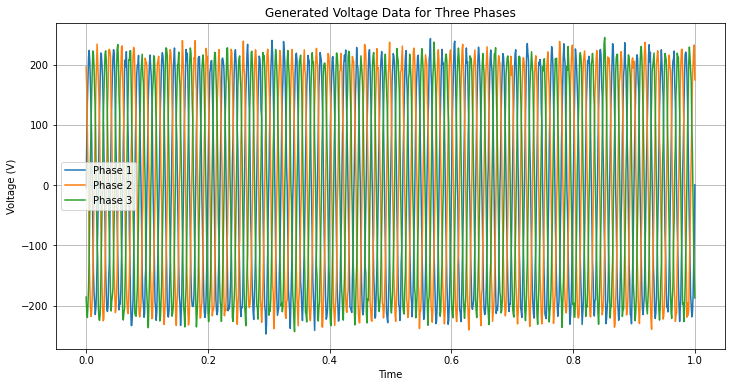

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of data points
num_points = 1000

# Time values
time = np.linspace(0, 1, num_points)

# Frequency of sine wave
frequency = 50  # 50 Hz

# Amplitude of sine wave
amplitude = 220  # 220 V

# Noise level
noise_level = 10

# Generate voltage data for each phase
voltage_phase1 = amplitude * np.sin(2 * np.pi * frequency * time) + np.random.normal(0, noise_level, num_points)
voltage_phase2 = amplitude * np.sin(2 * np.pi * frequency * time + 2 * np.pi / 3) + np.random.normal(0, noise_level, num_points)
voltage_phase3 = amplitude * np.sin(2 * np.pi * frequency * time + 4 * np.pi / 3) + np.random.normal(0, noise_level, num_points)

# Plot the generated voltage data
plt.figure(figsize=(12, 6))
plt.plot(time, voltage_phase1, label='Phase 1')
plt.plot(time, voltage_phase2, label='Phase 2')
plt.plot(time, voltage_phase3, label='Phase 3')
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Generated Voltage Data for Three Phases')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
from scipy.optimize import curve_fit

def static_transfer_switch_model(t, a, b):
    # Linear model for static transfer switch
    return a * t + b

# Combine the time and voltage data for all phases
time_data = np.concatenate([time, time, time])
voltage_data = np.concatenate([voltage_phase1, voltage_phase2, voltage_phase3])

# Fit the model to the data and obtain the parameters
fit_params, _ = curve_fit(static_transfer_switch_model, time_data, voltage_data)

# Extract the fitted parameters
a_fit, b_fit = fit_params

print("Fitted Parameters:")
print("a:", a_fit)
print("b:", b_fit)


Fitted Parameters:
a: 0.9385211710767877
b: -0.179169424058653


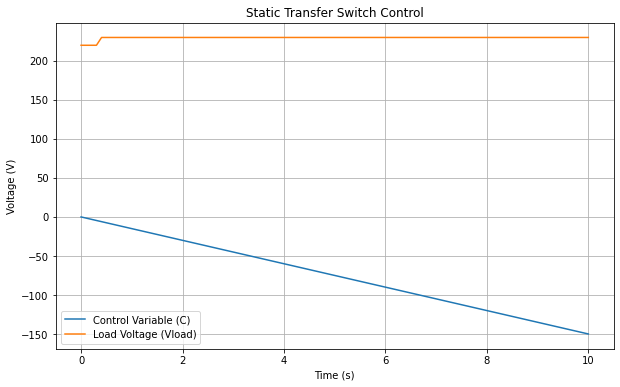

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define parameters
Vp = 220  # Primary source voltage (V)
Vs = 230  # Secondary source voltage (V)
threshold = 5  # Threshold for switching (V)

# Function representing the differential equation
def control_equation(C, t):
    dCdt = (Vp - Vs) - threshold
    return dCdt

# Time points for simulation
t_points = np.linspace(0, 10, 100)

# Initial condition for the control variable C
C0 = 0

# Numerically solve the differential equation
C_values = odeint(control_equation, C0, t_points)

# Calculate the load voltage based on the switch state
Vload_values = [Vp if abs(C) <= threshold else Vs for C in C_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_points, C_values, label='Control Variable (C)')
plt.plot(t_points, Vload_values, label='Load Voltage (Vload)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Static Transfer Switch Control')
plt.legend()
plt.grid(True)
plt.show()


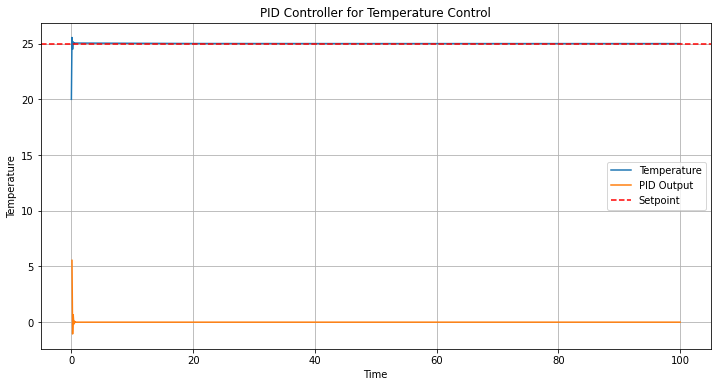

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the PID controller
Kp = 1.0  # Proportional gain
Ki = 0.1  # Integral gain
Kd = 0.01  # Derivative gain

# Setpoint temperature (desired temperature)
setpoint = 25.0

# Simulation time points
t_points = np.linspace(0, 100, 1000)
dt = t_points[1] - t_points[0]

# Initial conditions
current_temperature = 20.0  # Start at 20°C
error_integral = 0.0
last_error = 0.0

# Lists to store data for plotting
temperature_values = [current_temperature]
pid_output_values = []

# PID controller function
def pid_controller(setpoint, current_temperature, error_integral, last_error):
    error = setpoint - current_temperature
    error_integral += error * dt
    error_derivative = (error - last_error) / dt
    pid_output = Kp * error + Ki * error_integral + Kd * error_derivative
    last_error = error
    return pid_output, error_integral, last_error

# Simulate the control system
for t in t_points[1:]:
    pid_output, error_integral, last_error = pid_controller(setpoint, current_temperature, error_integral, last_error)
    current_temperature += pid_output
    temperature_values.append(current_temperature)
    pid_output_values.append(pid_output)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t_points, temperature_values, label='Temperature')
plt.plot(t_points[1:], pid_output_values, label='PID Output')
plt.axhline(y=setpoint, color='r', linestyle='--', label='Setpoint')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('PID Controller for Temperature Control')
plt.legend()
plt.grid(True)
plt.show()
